In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [2]:
dataset = pd.read_csv('breast-cancer.data', header=None)

In [3]:
dataset.replace('?', np.nan, inplace=True)
print("Missing Values: (Before Imputation)", dataset.isnull().values.any())

Missing Values: (Before Imputation) True


In [4]:
for column in dataset.columns:
    mode_value = dataset[column].mode()[0]  # Get the mode of the column
    dataset[column] = dataset[column].fillna(mode_value)

In [5]:
feature_label_encoders = {}
for column in dataset:
    if(dataset[column].dtype == 'object'):
        le = LabelEncoder()
        dataset[column] = le.fit_transform(dataset[column])
        feature_label_encoders[column] = le

In [6]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [7]:
y = np.where(y == 0, -1, 1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
linear_SVC = SVC(kernel = 'linear', random_state=0, decision_function_shape='ovr')
linear_SVC.fit(X_train, y_train)
y_pred1 = linear_SVC.predict(X_test)

In [10]:
non_linear_SVC = SVC(kernel='sigmoid', random_state=0)
non_linear_SVC.fit(X_train, y_train)
y_pred2 = non_linear_SVC.predict(X_test)


Accuracy Score (Linear Model):  0.8275862068965517
Accuracy Score (Non Linear Model):  0.8103448275862069


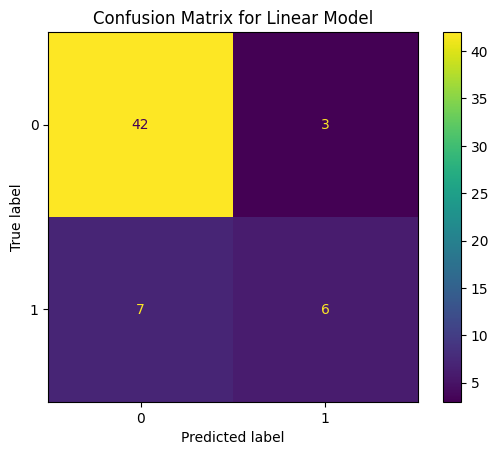

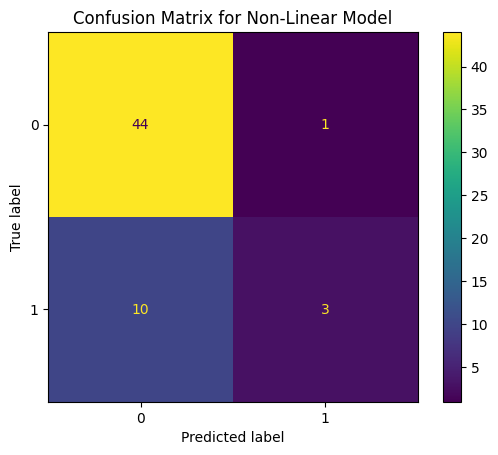

In [11]:
cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)
print("\nAccuracy Score (Linear Model): ", accuracy_score(y_test, y_pred1))
print("Accuracy Score (Non Linear Model): ", accuracy_score(y_test, y_pred2))

cm1_display = ConfusionMatrixDisplay(cm1)
cm1_display.plot()
plt.title('Confusion Matrix for Linear Model')
plt.show()

cm2_display = ConfusionMatrixDisplay(cm2)
cm2_display.plot()
plt.title('Confusion Matrix for Non-Linear Model')

plt.show()

In [12]:
decision_values1 = linear_SVC.decision_function(X_test)
hinge_loss_total1 = np.maximum(0, 1 - y_test * decision_values1)
average_hinge_loss1 = np.mean(hinge_loss_total1)
print("\nAverage Hinge Loss(Linear Model):", average_hinge_loss1)

decision_values2 = non_linear_SVC.decision_function(X_test)
hinge_loss_total2 = np.maximum(0, 1 - y_test * decision_values2)
average_hinge_loss2 = np.mean(hinge_loss_total2)
print("Average Hinge Loss(Non Linear Model):", average_hinge_loss2)


Average Hinge Loss(Linear Model): 0.4080884861165524
Average Hinge Loss(Non Linear Model): 0.5167225383433905
